# SAMCODIN


=== PENYALURAN PER KAB/KOTA
   Nama Kota/Kab Tujuan  Jumlah
37        Kota Surabaya   39382
23        Kab. Sidoarjo   19105
28     Kab. Tulungagung    6233
25         Kab. Sumenep    5668
33          Kota Malang    5559
35        Kota Pasuruan    5079
9         Kab. Lamongan    4810
13          Kab. Malang    4626
1       Kab. Banyuwangi    4274
6           Kab. Jember    3972
0        Kab. Bangkalan    2981
18       Kab. Pamekasan    2811
8           Kab. Kediri    2682
27           Kab. Tuban    2584
31          Kota Kediri    2324
4        Kab. Bondowoso    2213
2           Kab. Blitar    2033
24       Kab. Situbondo    1885
32          Kota Madiun    1860
3       Kab. Bojonegoro    1600
22         Kab. Sampang    1425
21     Kab. Probolinggo    1422
26      Kab. Trenggalek    1360
19        Kab. Pasuruan    1350
11          Kab. Madiun     973
7          Kab. Jombang     930
5           Kab. Gresik     929
20        Kab. Ponorogo     872
29            Kota Batu     697
14       Ka

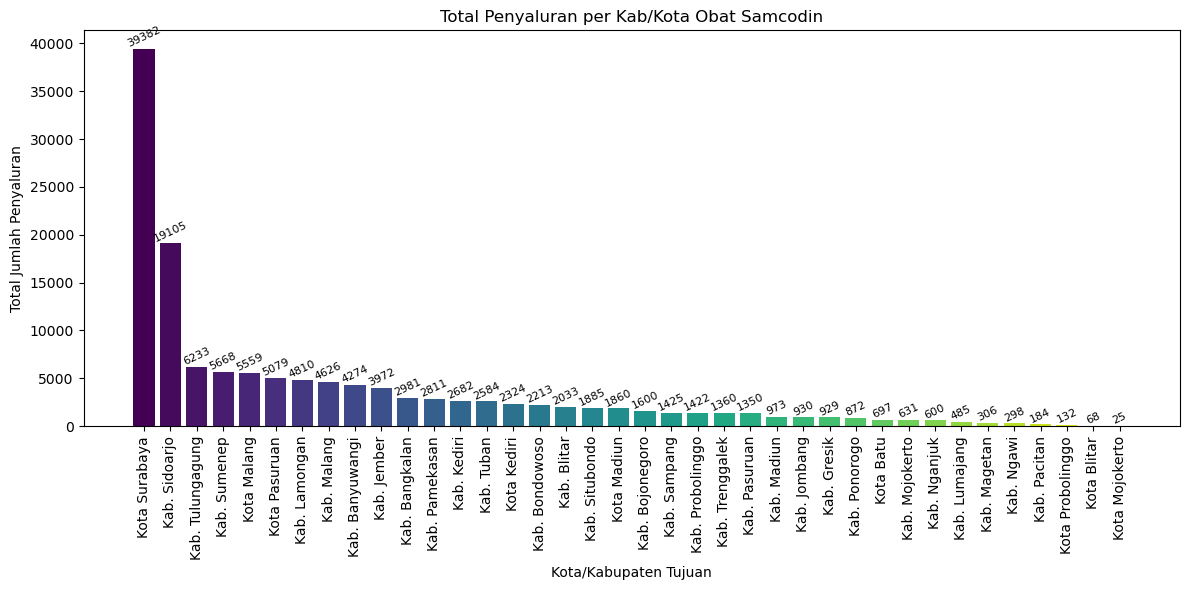

In [1]:
# LOAD DATA
import numpy as np
import pandas as pd
df = pd.read_excel(
    "C:/Users/IIN FEBYANTI/Magang Mandiri/samcodin 2025.xlsx",
    sheet_name="Samcodin"
)

# Pembersihan data
df_jatim = df[df["Nama Provinsi Tujuan"].str.contains("Jawa Timur", case=False, na=False)]
df_jatim = df_jatim[~df_jatim['Jenis Transaksi'].isin(['Retur', 'Koreksi Stok'])]
data_drop = ["No. Faktur", "Batch", "Satuan", "Keterangan"]
df_jatim = df_jatim.drop(columns=data_drop)
df_jatim['Jumlah'] = pd.to_numeric(df_jatim['Jumlah'], errors='coerce')


# REKAP PENYALURAN PER KAB/KOTA
penyaluran_kota = (
    df_jatim.groupby("Nama Kota/Kab Tujuan")["Jumlah"]
    .sum()
    .reset_index()
    .sort_values(by="Jumlah", ascending=False)
)

print("\n=== PENYALURAN PER KAB/KOTA")
print(penyaluran_kota)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(penyaluran_kota)))

bars = plt.bar(
    penyaluran_kota["Nama Kota/Kab Tujuan"],
    penyaluran_kota["Jumlah"],
    color=colors
)

plt.xticks(rotation=90)
plt.xlabel("Kota/Kabupaten Tujuan")
plt.ylabel("Total Jumlah Penyaluran")
plt.title("Total Penyaluran per Kab/Kota Obat Samcodin")

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval,
        f"{yval:.0f}",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=25
    )

plt.tight_layout()
plt.show()

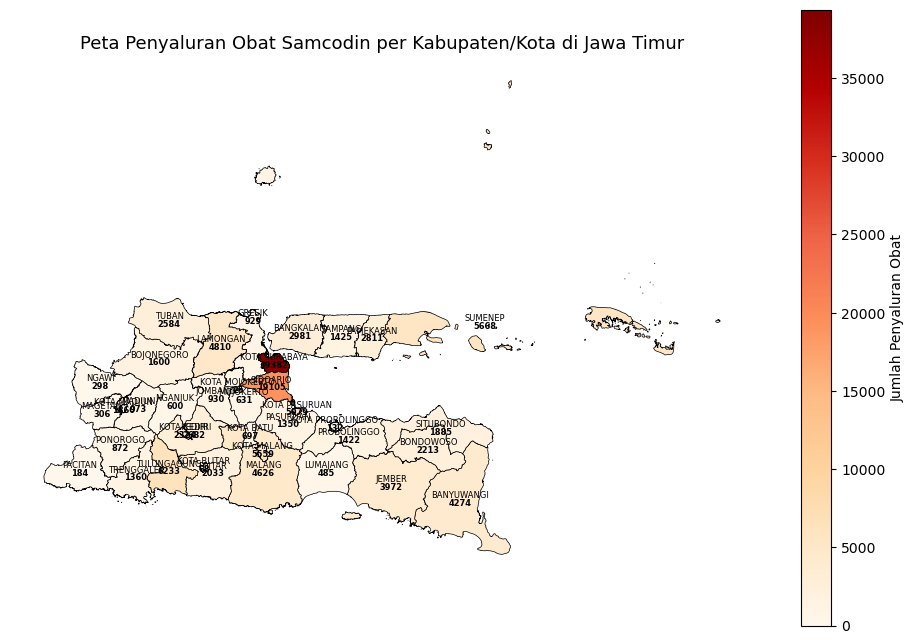

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# BACA DATA
excel_path = r"C:\Users\IIN FEBYANTI\Downloads\penyaluran_kota.xlsx"
penyaluran_samcodin = pd.read_excel(excel_path)

geojson_path = r"C:\Users\IIN FEBYANTI\Downloads\Jawa_Timur (2).geojson"
jatim_map = gpd.read_file(geojson_path)

# SAMAKAN NAMA KOLAM
penyaluran_samcodin.rename(
    columns={"Nama Kota/Kab Tujuan": "WADMKK"},
    inplace=True
)

penyaluran_samcodin["WADMKK"] = (
    penyaluran_samcodin["WADMKK"]
    .str.strip()
    .str.upper()
)

jatim_map["WADMKK"] = (
    jatim_map["WADMKK"]
    .str.strip()
    .str.upper()
)

# MERGE DATA
map_data = jatim_map.merge(
    penyaluran_samcodin,
    on="WADMKK",
    how="left"
)

map_data["Jumlah"] = map_data["Jumlah"].fillna(0)

# PLOT PETA + LEGENDA
fig, ax = plt.subplots(figsize=(12, 8))

map_data.plot(
    ax=ax,
    column="Jumlah",
    cmap="OrRd",               
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    legend_kwds={
        "label": "Jumlah Penyaluran Obat",
        "orientation": "vertical"
    }
)

# TAMBAH LABEL KOTA & NILAI
for _, row in map_data.iterrows():
    if row["geometry"] is not None:
        centroid = row["geometry"].centroid
        
        ax.text(
            centroid.x,
            centroid.y + 0.03,
            row["WADMKK"],
            ha="center",
            fontsize=6
        )
        
        ax.text(
            centroid.x,
            centroid.y - 0.03,
            int(row["Jumlah"]),
            ha="center",
            fontsize=6,
            fontweight="bold"
        )

ax.set_title(
    "Peta Penyaluran Obat Samcodin per Kabupaten/Kota di Jawa Timur",
    fontsize=13
)
ax.axis("off")

plt.show()



=== TOP 5 PENYALURAN OBAT SAMCODIN PER SARANA DI Kota Surabaya ===
                Tujuan Penyaluran  Jumlah
125   PT LIMAN THAKA MAKMUR ABADI   17600
60                     EDNU SURYA    3600
122  PIEROSCA TERANG SUKSES ABADI    3000
61           EKKLESIA INDAH FARMA    2400
102             LANCAR JAYA SEHAT    1400


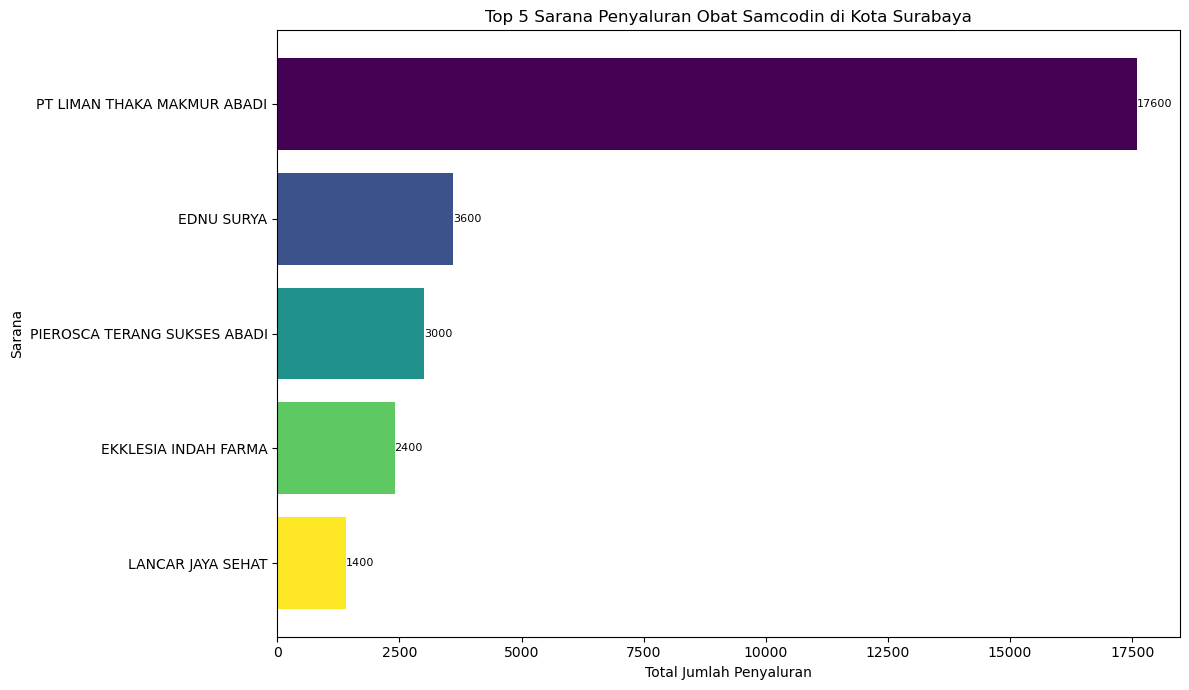


STATISTIKA DESKRIPTIF SAMCODIN WILAYAH KOTA SURABAYA
count       10.000000
mean      3938.200000
std       3950.711688
min        102.000000
25%        529.250000
50%       2716.000000
75%       7396.500000
max      10563.000000
Name: Jumlah, dtype: float64

Runs Test
Z-Statistic: -1.6771
P-Value: 0.0935
Keputusan: Gagal tolak H0 → Data bersifat acak

UJI DISTRIBUSI POISSON
n: 10
Rata-rata (mu): 1760.0
P(x) minimum : 0.0
Alpha: 0.05
Keputusan: Tolak H0 → Data TIDAK mengikuti Poisson.

Laney c’ Chart
Z-Factor : 47.1297
CL : 1760.0
UCL: 7691.61
LCL: 0


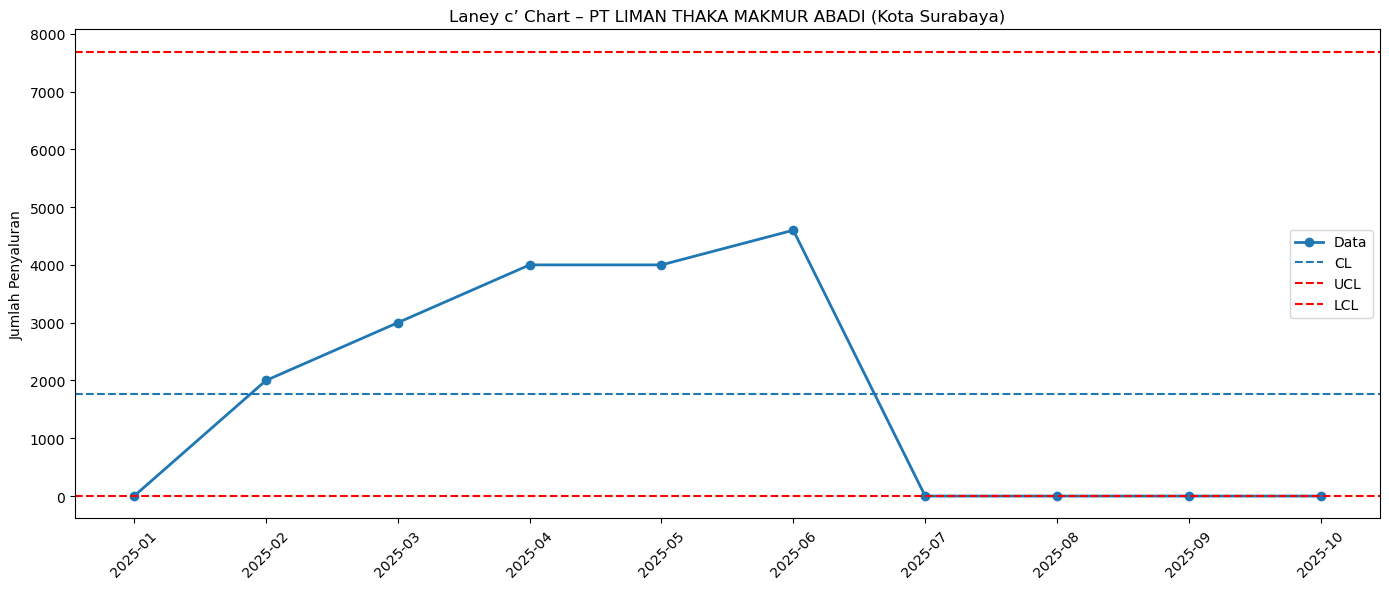


TITIK OUT-OF-CONTROL 
Tidak ada titik keluar batas kendali.


In [3]:
# PILIH KOTA TERBANYAK UNTUK ANALISIS SARANAN PENERIMA
kota_terbanyak = penyaluran_kota.iloc[0, 0]     
df_kota = df_jatim[df_jatim["Nama Kota/Kab Tujuan"] == kota_terbanyak]

penyaluran_apotek_kota = (
    df_kota.groupby("Tujuan Penyaluran")["Jumlah"]
           .sum()
           .reset_index()
           .sort_values(by="Jumlah", ascending=False)
           .head(5)
)
output_file = "Penyalurann Sarana Samcodin.xlsx"
penyaluran_apotek_kota.to_excel(output_file, index=False)

print(f"\n=== TOP 5 PENYALURAN OBAT SAMCODIN PER SARANA DI {kota_terbanyak} ===")
print(penyaluran_apotek_kota)


# VISUALISASI TOP 5 APOTEK 
plt.figure(figsize=(12, 7))

colors = plt.cm.viridis(np.linspace(0, 1, len(penyaluran_apotek_kota)))

bars = plt.barh(
    penyaluran_apotek_kota["Tujuan Penyaluran"],
    penyaluran_apotek_kota["Jumlah"],
    color=colors
)

plt.xlabel("Total Jumlah Penyaluran")
plt.ylabel("Sarana")
plt.title(f"Top 5 Sarana Penyaluran Obat Samcodin di {kota_terbanyak}")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f"{width:.0f}",
        va='center',
        ha='left',
        fontsize=8
    )

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# PENYALURAN BULANAN – SEMUA SARANA DI KOTA
sarana_terbanyak = penyaluran_apotek_kota.iloc[0, 0]

df_kota_copy = df_kota.copy()
df_kota_copy.loc[:, "Tanggal Penyaluran"] = pd.to_datetime(df_kota_copy["Tanggal Penyaluran"], errors='coerce')
df_kota_copy.loc[:, "Bulan"] = df_kota_copy["Tanggal Penyaluran"].dt.to_period("M")

semua_bulan = pd.period_range(
    start=df_kota_copy["Bulan"].min(),
    end=df_kota_copy["Bulan"].max(),
    freq="M"
)

# Hitung jumlah penyaluran per bulan hanya dari Top 1 sarana
df_sarana_top1 = df_kota[df_kota["Tujuan Penyaluran"] == sarana_terbanyak].copy()
df_sarana_top1.loc[:, "Tanggal Penyaluran"] = pd.to_datetime(df_sarana_top1["Tanggal Penyaluran"], errors='coerce')
df_sarana_top1.loc[:, "Bulan"] = df_sarana_top1["Tanggal Penyaluran"].dt.to_period("M")

penyaluran_bulanan = (
    df_sarana_top1.groupby("Bulan")["Jumlah"]
                   .sum()
                   .reindex(semua_bulan, fill_value=0)
)
penyaluran_bulanan.index = penyaluran_bulanan.index.astype(str)

# STATISTIKA DESKRIPTIF BERDASARKAN WILAYAH TOP 1
df_samcodin_surabaya = df_kota.copy()
df_samcodin_surabaya["Tanggal Penyaluran"] = pd.to_datetime(df_samcodin_surabaya["Tanggal Penyaluran"], errors="coerce")
df_samcodin_surabaya["Bulan"] = df_samcodin_surabaya["Tanggal Penyaluran"].dt.to_period("M")

penyaluran_bulanan_wilayah = (
    df_samcodin_surabaya.groupby("Bulan")["Jumlah"]
                 .sum()
                 .reindex(semua_bulan, fill_value=0)
)

penyaluran_bulanan_wilayah.index = penyaluran_bulanan_wilayah.index.astype(str)

print("\nSTATISTIKA DESKRIPTIF SAMCODIN WILAYAH KOTA SURABAYA")
print(penyaluran_bulanan_wilayah.describe())

# UJI RUN TEST (Keacakan)
from statsmodels.sandbox.stats.runs import runstest_1samp
import numpy as np
x = penyaluran_bulanan.values
median_data = np.median(x)
z_stat, p_value = runstest_1samp(x, cutoff=median_data)

print("\nRuns Test")
print("Z-Statistic:", round(z_stat, 4))
print("P-Value:", round(p_value, 4))
if p_value > 0.05:
    print("Keputusan: Gagal tolak H0 → Data bersifat acak")
else:
    print("Keputusan: Tolak H0 → Data tidak acak")

# UJI DISTRIBUSI POISSON
print("\nUJI DISTRIBUSI POISSON")

from math import factorial, exp, log
mu = penyaluran_bulanan.mean()
alpha = 0.05

p_val = []
for xi in x:
    log_Px = xi * log(mu) - mu - log(factorial(xi))
    p_val.append(exp(log_Px))

P_min = min(p_val)

print("n:", len(x))
print("Rata-rata (mu):", round(mu, 4))
print("P(x) minimum :", P_min)
print("Alpha:", alpha)

if P_min <= alpha:
    print("Keputusan: Tolak H0 → Data TIDAK mengikuti Poisson.")
else:
    print("Keputusan: Gagal tolak H0 → Data mengikuti Poisson.")

# LANEY C-CHART
print("\nLaney c’ Chart")

CL = mu
sigma_basic = np.sqrt(mu)

observed_sigma = np.std(x, ddof=1)
expected_sigma = sigma_basic

Z = observed_sigma / expected_sigma
sigma_laney = sigma_basic * Z

UCL = CL + 3 * sigma_laney
LCL = max(CL - 3 * sigma_laney, 0)

print("Z-Factor :", round(Z, 4))
print("CL :", round(CL, 2))
print("UCL:", round(UCL, 2))
print("LCL:", round(LCL, 2))

plt.figure(figsize=(14, 6))
plt.plot(penyaluran_bulanan.index, x, marker="o", linewidth=2, label="Data")

plt.axhline(CL, linestyle="--", label="CL")
plt.axhline(UCL, color="red", linestyle="--", label="UCL")
plt.axhline(LCL, color="red", linestyle="--", label="LCL")

plt.title(f"Laney c’ Chart – {sarana_terbanyak} ({kota_terbanyak})")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Penyaluran")
plt.legend()
plt.tight_layout()
plt.show()

# Titik out-of-control
print("\nTITIK OUT-OF-CONTROL ")
out = []
for i, val in enumerate(x):
    if val > UCL or val < LCL:
        out.append((penyaluran_bulanan.index[i], val))

if len(out) == 0:
    print("Tidak ada titik keluar batas kendali.")
else:
    for o in out:
        print(f"{o[0]} → {o[1]}")

# SELEDRYL


=== PENYALURAN PER KAB/KOTA (TOP–DOWN) ===
   Nama Kota/Kab Tujuan  Jumlah
22          Kota Malang  289400
15        Kab. Sidoarjo   26902
23        Kota Surabaya   12417
0       Kab. Banyuwangi    1983
14        Kab. Ponorogo     509
3       Kab. Bojonegoro     128
9           Kab. Madiun     112
8         Kab. Lamongan      97
7           Kab. Kediri      81
16       Kab. Situbondo      55
1           Kab. Blitar      52
5           Kab. Jember      47
21          Kota Madiun      28
13           Kab. Ngawi      23
19     Kab. Tulungagung      20
17         Kab. Sumenep      14
12         Kab. Nganjuk      14
11          Kab. Nabire      10
4           Kab. Gresik       9
10       Kab. Mojokerto       7
18           Kab. Tuban       6
20            Kota Batu       5
2          Kab. Blitar        3
6          Kab. Jombang       1


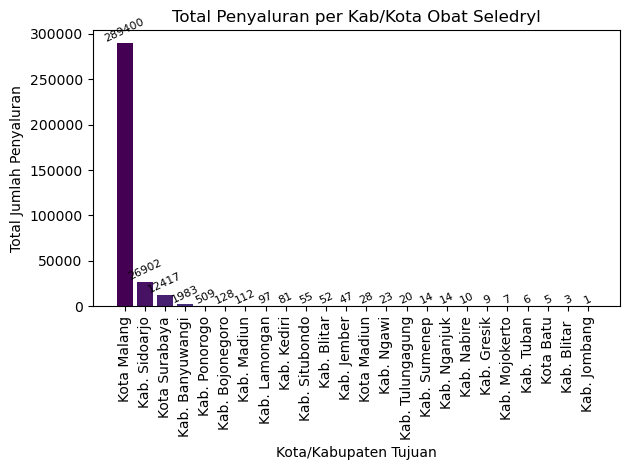

In [15]:
# LOAD DATA
import numpy as np
import pandas as pd
df = pd.read_excel(
    "C:/Users/IIN FEBYANTI/Magang Mandiri/seledryl 2025.xlsx",
    sheet_name="Seledryl"
)

# Pembersihan Data
df_jatim = df[df["Nama Provinsi Tujuan"].str.contains("Jawa Timur", case=False, na=False)]
df_jatim = df_jatim[~df_jatim['Jenis Transaksi'].isin(['Retur', 'Koreksi Stok'])]
data_drop = ["No. Faktur", "Batch", "Satuan", "Keterangan"]
df_jatim = df_jatim.drop(columns=data_drop)
df_jatim['Jumlah'] = pd.to_numeric(df_jatim['Jumlah'], errors='coerce')


# REKAP PENYALURAN PER KAB/KOTA
penyaluran_kota = (
    df_jatim.groupby("Nama Kota/Kab Tujuan")["Jumlah"]
    .sum()
    .reset_index()
    .sort_values(by="Jumlah", ascending=False)
)

print("\n=== PENYALURAN PER KAB/KOTA (TOP–DOWN) ===")
print(penyaluran_kota)


# VISUALISASI PENYALURAN PER KOTA 
colors = plt.cm.viridis(np.linspace(0, 1, len(penyaluran_kota)))

bars = plt.bar(
    penyaluran_kota["Nama Kota/Kab Tujuan"],
    penyaluran_kota["Jumlah"],
    color=colors
)

plt.xticks(rotation=90)
plt.xlabel("Kota/Kabupaten Tujuan")
plt.ylabel("Total Jumlah Penyaluran")
plt.title("Total Penyaluran per Kab/Kota Obat Seledryl")

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval,
        f"{yval:.0f}",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=25
    )

plt.tight_layout()
plt.show()

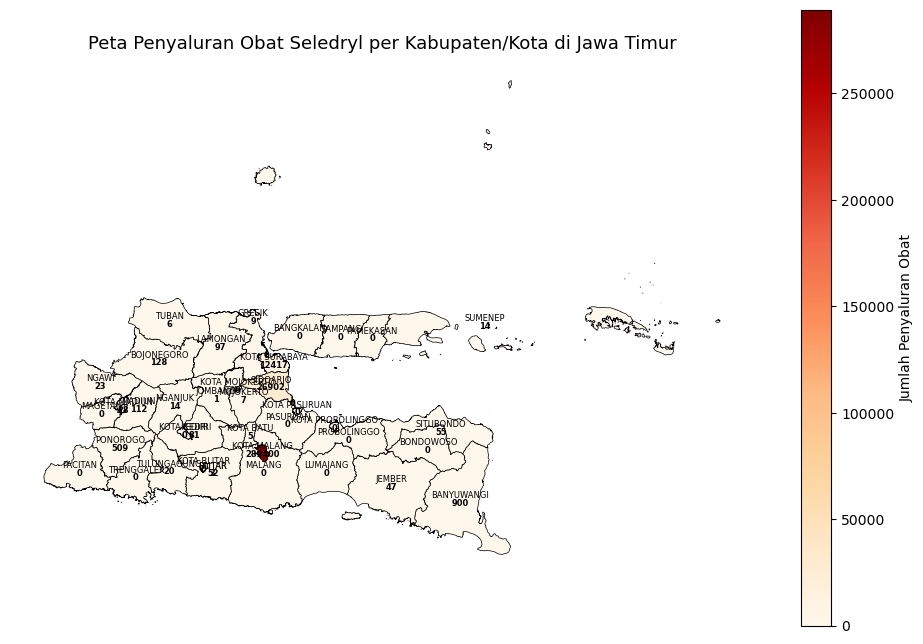

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# BACA DATA
excel_path = r"C:\Users\IIN FEBYANTI\Downloads\penyaluran_kota_seledryl.xlsx"
penyaluran_samcodin = pd.read_excel(excel_path)

geojson_path = r"C:\Users\IIN FEBYANTI\Downloads\Jawa_Timur (2).geojson"
jatim_map = gpd.read_file(geojson_path)

# SAMAKAN NAMA KOLAM
penyaluran_samcodin.rename(
    columns={"Nama Kota/Kab Tujuan": "WADMKK"},
    inplace=True
)

penyaluran_samcodin["WADMKK"] = (
    penyaluran_samcodin["WADMKK"]
    .str.strip()
    .str.upper()
)

jatim_map["WADMKK"] = (
    jatim_map["WADMKK"]
    .str.strip()
    .str.upper()
)

# MERGE DATA
map_data = jatim_map.merge(
    penyaluran_samcodin,
    on="WADMKK",
    how="left"
)

map_data["Jumlah"] = map_data["Jumlah"].fillna(0)

# PLOT PETA + LEGENDA
fig, ax = plt.subplots(figsize=(12, 8))

map_data.plot(
    ax=ax,
    column="Jumlah",
    cmap="OrRd",               
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    legend_kwds={
        "label": "Jumlah Penyaluran Obat",
        "orientation": "vertical"
    }
)

# TAMBAH LABEL KOTA & NILAI
for _, row in map_data.iterrows():
    if row["geometry"] is not None:
        centroid = row["geometry"].centroid
        
        ax.text(
            centroid.x,
            centroid.y + 0.03,
            row["WADMKK"],
            ha="center",
            fontsize=6
        )
        
        ax.text(
            centroid.x,
            centroid.y - 0.03,
            int(row["Jumlah"]),
            ha="center",
            fontsize=6,
            fontweight="bold"
        )

ax.set_title(
    "Peta Penyaluran Obat Seledryl per Kabupaten/Kota di Jawa Timur",
    fontsize=13
)
ax.axis("off")

plt.show()



=== TOP 5 PENYALURAN OBAT SELEDRYL PER SARANA DI Kota Malang ===
          Tujuan Penyaluran  Jumlah
0  BHAKTI BETSEN LESTARI PT  289400


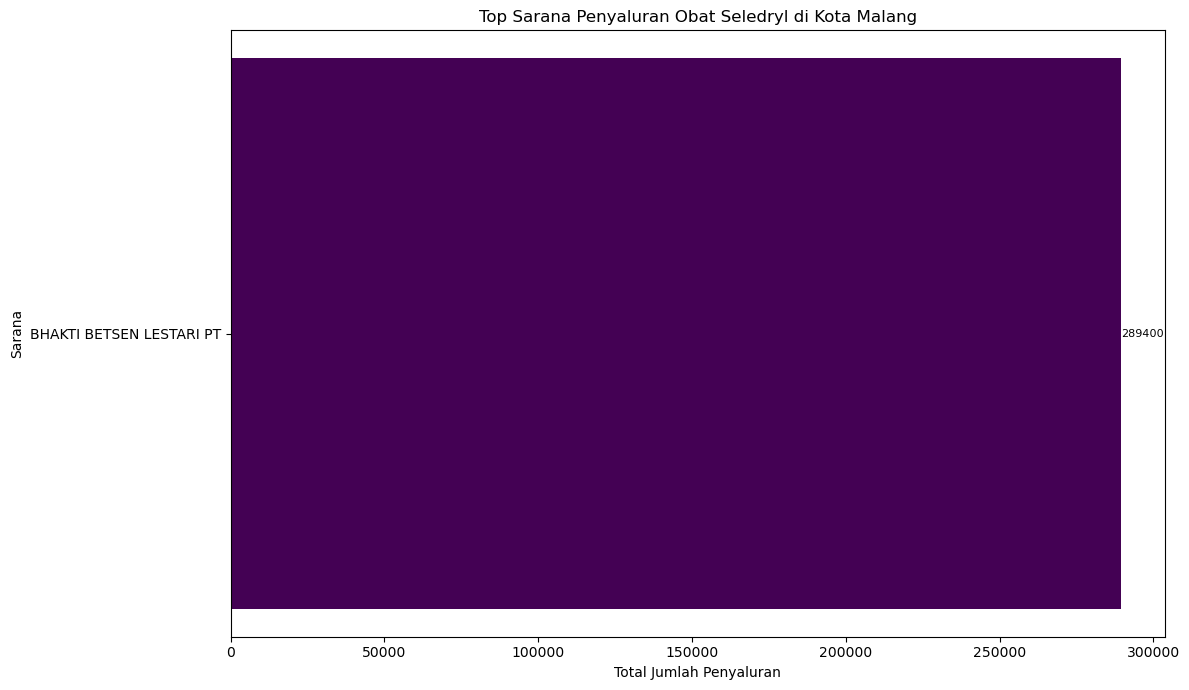


STATISTIKA DESKRIPTIF SELEDRYL WILAYAH KOTA MALANG
count        9.000000
mean     32155.555556
std      12483.400089
min      10000.000000
25%      29300.000000
50%      30100.000000
75%      40000.000000
max      50000.000000
Name: Jumlah, dtype: float64

Total Penyaluran Wilayah: 289400
Rata-rata (c-bar wilayah): 32155.555555555555
Std Dev Wilayah: 12483.400088829076

Runs Test
Z-Statistic: 0.7631
P-Value: 0.4454
Keputusan: Gagal tolak H0 → Data bersifat acak

UJI DISTRIBUSI POISSON
n: 9
Rata-rata (mu): 32155.5556
P(x) minimum : 0.0
Alpha: 0.05
Keputusan: Tolak H0 → Data TIDAK mengikuti Poisson.

Laney c’ Chart
Z-Factor : 69.6153
CL : 32155.56
UCL: 69605.76
LCL: 0


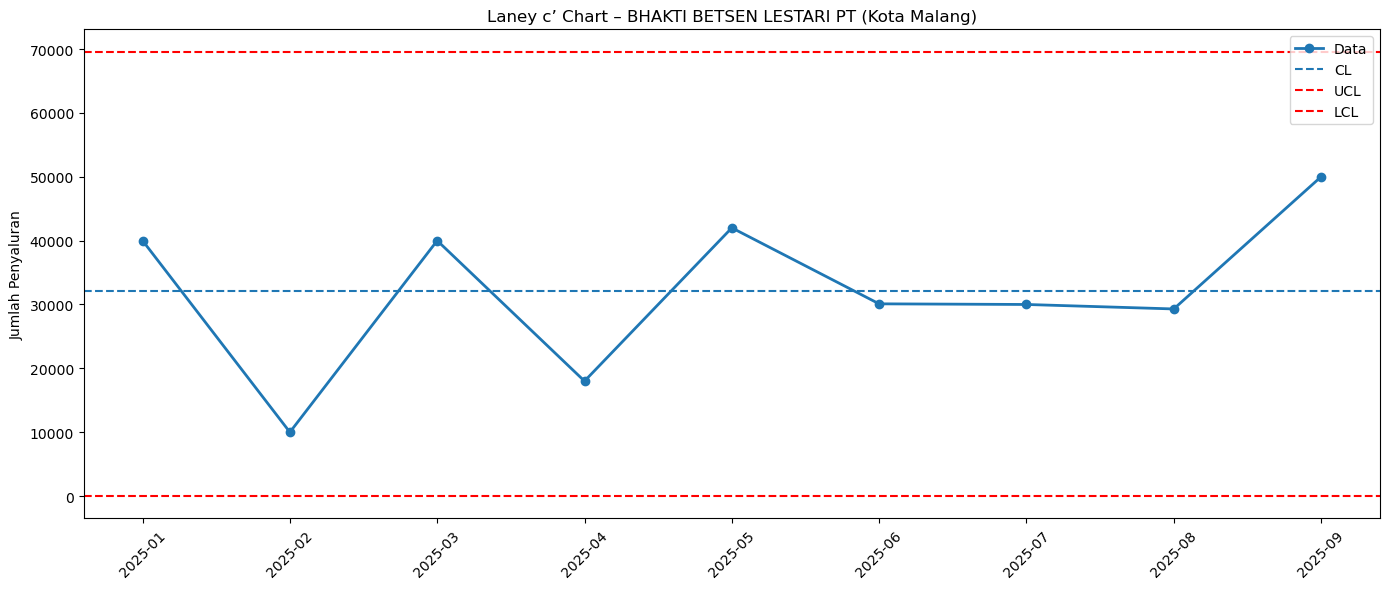


=== TITIK OUT-OF-CONTROL ===
Tidak ada titik keluar batas kendali.


In [9]:
# PILIH KOTA TERBANYAK UNTUK ANALISIS SARANA PENERIMA
kota_terbanyak = penyaluran_kota.iloc[0, 0]    
df_kota = df_jatim[df_jatim["Nama Kota/Kab Tujuan"] == kota_terbanyak]

penyaluran_apotek_kota = (
    df_kota.groupby("Tujuan Penyaluran")["Jumlah"]
           .sum()
           .reset_index()
           .sort_values(by="Jumlah", ascending=False)
           .head(5)
)
output_file = "Penyalurann Sarana Seledryl.xlsx"
penyaluran_apotek_kota.to_excel(output_file, index=False)
print(f"\n=== TOP 5 PENYALURAN OBAT SELEDRYL PER SARANA DI {kota_terbanyak} ===")
print(penyaluran_apotek_kota)


# VISUALISASI TOP 5 SARANA
plt.figure(figsize=(12, 7))

colors = plt.cm.viridis(np.linspace(0, 1, len(penyaluran_apotek_kota)))

bars = plt.barh(
    penyaluran_apotek_kota["Tujuan Penyaluran"],
    penyaluran_apotek_kota["Jumlah"],
    color=colors
)

plt.xlabel("Total Jumlah Penyaluran")
plt.ylabel("Sarana")
plt.title(f"Top Sarana Penyaluran Obat Seledryl di {kota_terbanyak}")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f"{width:.0f}",
        va='center',
        ha='left',
        fontsize=8
    )

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# PENYALURAN BULANAN – SEMUA SARANA DI KOTA
sarana_terbanyak = penyaluran_apotek_kota.iloc[0, 0]

df_kota_copy2 = df_kota.copy()
df_kota_copy2.loc[:, "Tanggal Penyaluran"] = pd.to_datetime(df_kota_copy2["Tanggal Penyaluran"], errors='coerce')
df_kota_copy2.loc[:, "Bulan"] = df_kota_copy2["Tanggal Penyaluran"].dt.to_period("M")

semua_bulan = pd.period_range(
    start=df_kota_copy2["Bulan"].min(),
    end=df_kota_copy2["Bulan"].max(),
    freq="M"
)

# Hitung jumlah penyaluran per bulan hanya dari Top 1 sarana
df_sarana_top1 = df_kota[df_kota["Tujuan Penyaluran"] == sarana_terbanyak].copy()
df_sarana_top1.loc[:, "Tanggal Penyaluran"] = pd.to_datetime(df_sarana_top1["Tanggal Penyaluran"], errors='coerce')
df_sarana_top1.loc[:, "Bulan"] = df_sarana_top1["Tanggal Penyaluran"].dt.to_period("M")

penyaluran_bulanan = (
    df_sarana_top1.groupby("Bulan")["Jumlah"]
                   .sum()
                   .reindex(semua_bulan, fill_value=0)
)
penyaluran_bulanan.index = penyaluran_bulanan.index.astype(str)

# STATISTIKA DESKRIPTIF BERDASARKAN WILAYAH TOP 1
df_seledryl_malang = df_kota.copy()
df_seledryl_malang["Tanggal Penyaluran"] = pd.to_datetime(df_seledryl_malang["Tanggal Penyaluran"], errors="coerce")
df_seledryl_malang["Bulan"] = df_seledryl_malang["Tanggal Penyaluran"].dt.to_period("M")

penyaluran_bulanan_wilayah = (
    df_kota_copy2.groupby("Bulan")["Jumlah"]
                 .sum()
                 .reindex(semua_bulan, fill_value=0)
)

penyaluran_bulanan_wilayah.index = penyaluran_bulanan_wilayah.index.astype(str)

print("\nSTATISTIKA DESKRIPTIF SELEDRYL WILAYAH KOTA MALANG")
print(penyaluran_bulanan_wilayah.describe())

# UJI RUN TEST (Keacakan)
from statsmodels.sandbox.stats.runs import runstest_1samp
x = penyaluran_bulanan.values
median_data = np.median(x)
z_stat, p_value = runstest_1samp(x, cutoff=median_data)

print("\nRuns Test")
print("Z-Statistic:", round(z_stat,4))
print("P-Value:", round(p_value,4))
if p_value > 0.05:
    print("Keputusan: Gagal tolak H0 → Data bersifat acak")
else:
    print("Keputusan: Tolak H0 → Data tidak acak")

# UJI DISTRIBUSI POISSON
print("\nUJI DISTRIBUSI POISSON")

from math import factorial, exp, log
mu = penyaluran_bulanan.mean()
alpha = 0.05

p_val = []
for xi in x:
    log_Px = xi * log(mu) - mu - log(factorial(xi))
    p_val.append(exp(log_Px))

P_min = min(p_val)

print("n:", len(x))
print("Rata-rata (mu):", round(mu, 4))
print("P(x) minimum :", P_min)
print("Alpha:", alpha)

if P_min <= alpha:
    print("Keputusan: Tolak H0 → Data TIDAK mengikuti Poisson.")
else:
    print("Keputusan: Gagal tolak H0 → Data mengikuti Poisson.")


# 10. LANEY c’ CHART
print("\nLaney c’ Chart")

CL = mu
sigma_basic = np.sqrt(mu)

observed_sigma = np.std(x, ddof=1)
expected_sigma = sigma_basic

Z = observed_sigma / expected_sigma
sigma_laney = sigma_basic * Z

UCL = CL + 3 * sigma_laney
LCL = max(CL - 3 * sigma_laney, 0)

print("Z-Factor :", round(Z, 4))
print("CL :", round(CL, 2))
print("UCL:", round(UCL, 2))
print("LCL:", round(LCL, 2))

# Plot Laney Chart
plt.figure(figsize=(14, 6))
plt.plot(penyaluran_bulanan.index, x, marker="o", linewidth=2, label="Data")

plt.axhline(CL, linestyle="--", label="CL")
plt.axhline(UCL, color="red", linestyle="--", label="UCL")
plt.axhline(LCL, color="red", linestyle="--", label="LCL")

plt.title(f"Laney c’ Chart – {sarana_terbanyak} ({kota_terbanyak})")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Penyaluran")
plt.legend()
plt.tight_layout()
plt.show()

# Titik out-of-control
print("\n=== TITIK OUT-OF-CONTROL ===")
out = []
for i, val in enumerate(x):
    if val > UCL or val < LCL:
        out.append((penyaluran_bulanan.index[i], val))

if len(out) == 0:
    print("Tidak ada titik keluar batas kendali.")
else:
    for o in out:
        print(f"{o[0]} → {o[1]}")

# IFARSYL


=== PENYALURAN PER KAB/KOTA (TOP–DOWN) ===
   Nama Kota/Kab Tujuan  Jumlah
33        Kota Surabaya   47878
31          Kota Malang   19373
19        Kab. Ponorogo    7128
12          Kab. Malang    2253
8         Kab. Lamongan    1891
26     Kab. Tulungagung    1776
18        Kab. Pasuruan    1530
10          Kab. Madiun    1000
5           Kab. Jember     978
14         Kab. Nganjuk     961
3       Kab. Bojonegoro     871
16         Kab. Pacitan     803
21        Kab. Sidoarjo     747
30          Kota Madiun     713
7           Kab. Kediri     661
1       Kab. Banyuwangi     528
15           Kab. Ngawi     451
11         Kab. Magetan     373
23         Kab. Sumenep     365
6          Kab. Jombang     273
13       Kab. Mojokerto     268
0        Kab. Bangkalan     224
4           Kab. Gresik     218
28          Kota Blitar     175
2           Kab. Blitar     121
24      Kab. Trenggalek     118
29          Kota Kediri      91
22       Kab. Situbondo      60
9         Kab. Lumajang     

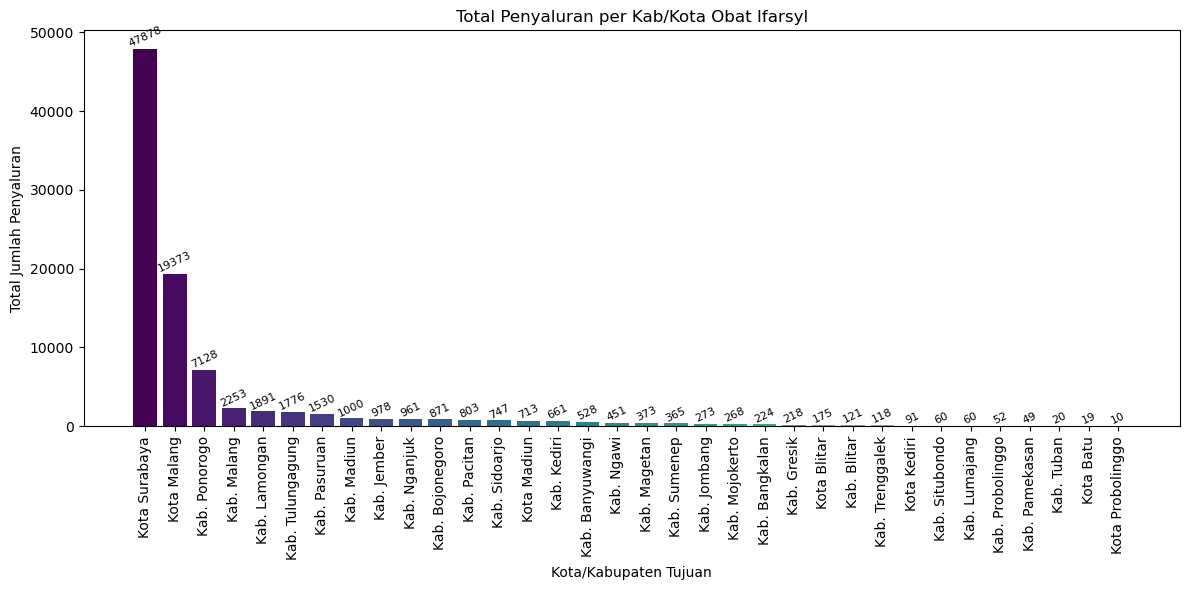

In [15]:
# LOAD DATA
import numpy as np
import pandas as pd
df = pd.read_excel(
    "C:/Users/IIN FEBYANTI/Magang Mandiri/ifarsil 2025.xlsx",
    sheet_name="Ifarsyl"
)

# Pembersihan Data
df_jatim = df[df["Nama Provinsi Tujuan"].str.contains("Jawa Timur", case=False, na=False)]
df_jatim = df_jatim[~df_jatim['Jenis Transaksi'].isin(['Retur', 'Koreksi Stok'])]
data_drop = ["No. Faktur", "Batch", "Satuan", "Keterangan"]
df_jatim = df_jatim.drop(columns=data_drop)
df_jatim['Jumlah'] = pd.to_numeric(df_jatim['Jumlah'], errors='coerce')


# REKAP PENYALURAN PER KAB/KOTA
penyaluran_kota = (
    df_jatim.groupby("Nama Kota/Kab Tujuan")["Jumlah"]
    .sum()
    .reset_index()
    .sort_values(by="Jumlah", ascending=False)
)

print("\n=== PENYALURAN PER KAB/KOTA (TOP–DOWN) ===")
print(penyaluran_kota)

# VISUALISASI PENYALURAN PER KOTA 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(penyaluran_kota)))

bars = plt.bar(
    penyaluran_kota["Nama Kota/Kab Tujuan"],
    penyaluran_kota["Jumlah"],
    color=colors
)

plt.xticks(rotation=90)
plt.xlabel("Kota/Kabupaten Tujuan")
plt.ylabel("Total Jumlah Penyaluran")
plt.title("Total Penyaluran per Kab/Kota Obat Ifarsyl")

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval,
        f"{yval:.0f}",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=25
    )

plt.tight_layout()
plt.show()

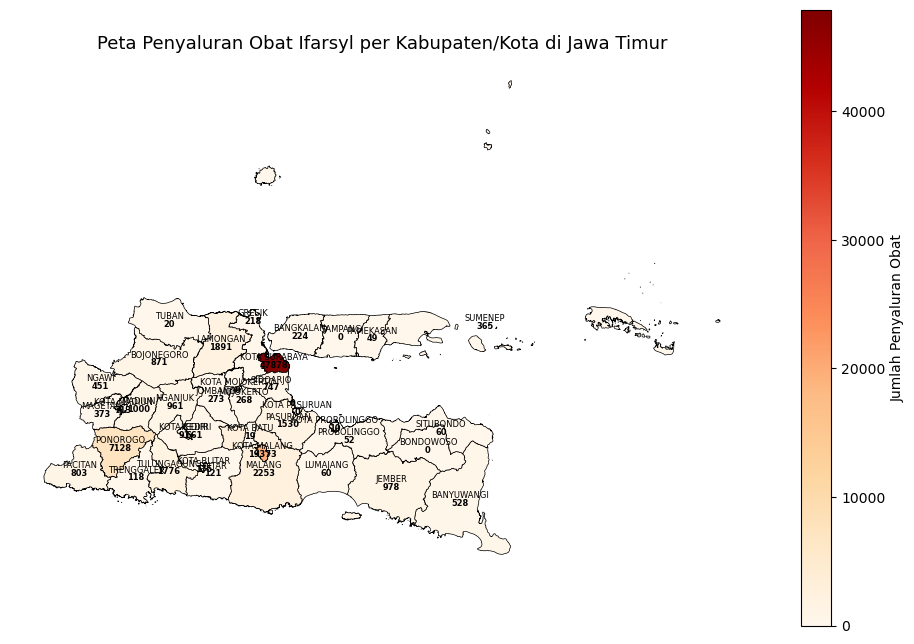

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# BACA DATA
excel_path = r"C:\Users\IIN FEBYANTI\Downloads\penyaluran_kota_ifarsyl.xlsx"
penyaluran_samcodin = pd.read_excel(excel_path)

geojson_path = r"C:\Users\IIN FEBYANTI\Downloads\Jawa_Timur (2).geojson"
jatim_map = gpd.read_file(geojson_path)

# SAMAKAN NAMA KOLAM
penyaluran_samcodin.rename(
    columns={"Nama Kota/Kab Tujuan": "WADMKK"},
    inplace=True
)

penyaluran_samcodin["WADMKK"] = (
    penyaluran_samcodin["WADMKK"]
    .str.strip()
    .str.upper()
)

jatim_map["WADMKK"] = (
    jatim_map["WADMKK"]
    .str.strip()
    .str.upper()
)

# MERGE DATA
map_data = jatim_map.merge(
    penyaluran_samcodin,
    on="WADMKK",
    how="left"
)

map_data["Jumlah"] = map_data["Jumlah"].fillna(0)

# PLOT PETA + LEGENDA
fig, ax = plt.subplots(figsize=(12, 8))

map_data.plot(
    ax=ax,
    column="Jumlah",
    cmap="OrRd",               
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    legend_kwds={
        "label": "Jumlah Penyaluran Obat",
        "orientation": "vertical"
    }
)

# TAMBAH LABEL KOTA & NILAI
for _, row in map_data.iterrows():
    if row["geometry"] is not None:
        centroid = row["geometry"].centroid
        
        ax.text(
            centroid.x,
            centroid.y + 0.03,
            row["WADMKK"],
            ha="center",
            fontsize=6
        )
        
        ax.text(
            centroid.x,
            centroid.y - 0.03,
            int(row["Jumlah"]),
            ha="center",
            fontsize=6,
            fontweight="bold"
        )

ax.set_title(
    "Peta Penyaluran Obat Ifarsyl per Kabupaten/Kota di Jawa Timur",
    fontsize=13
)
ax.axis("off")

plt.show()



=== TOP 10 PENYALURAN OBAT IFARSYL PER SARANA DI Kota Surabaya ===
                   Tujuan Penyaluran  Jumlah
8           EKKLESIA INDAH FARMA, PT   17760
7                     EDNU SURYA, PT   15120
16  PIEROSCA TERANG SUKSES ABADI, PT   10200
10        GUNUNG MAS JAYA SENTOSA PT     991
0           ALVINDO JUHAN LESTARI PT     720


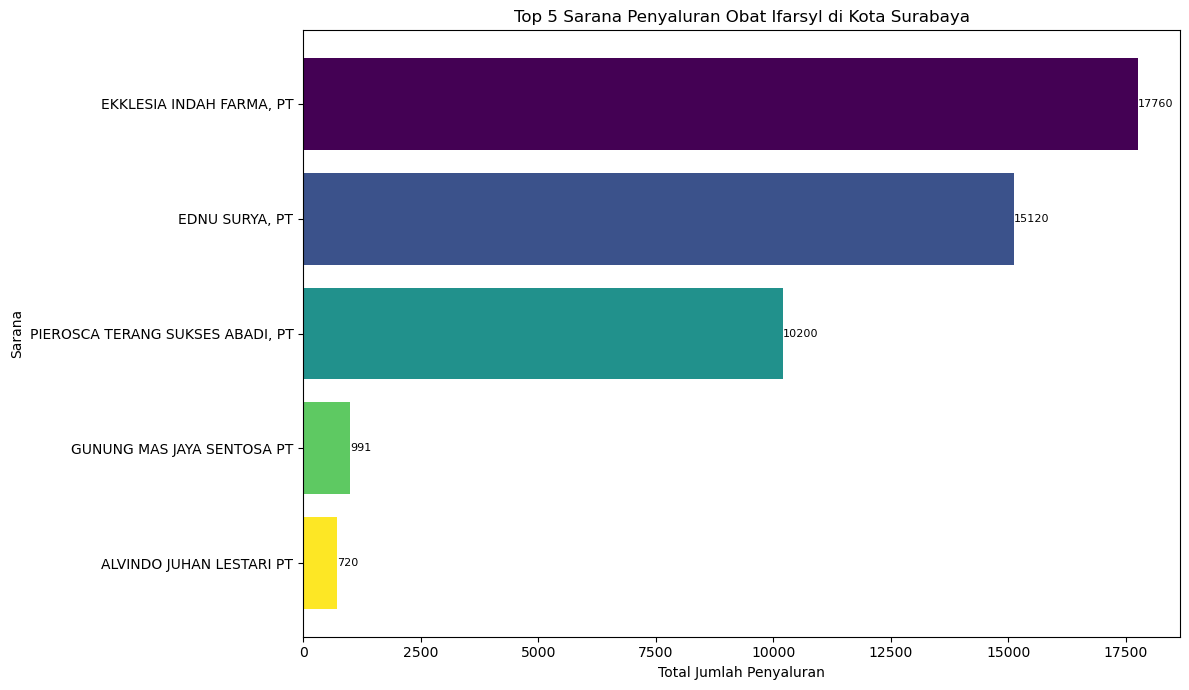


STATISTIKA DESKRIPTIF IFARSYL WILAYAH KOTA SURABAYA
count      10.000000
mean     4787.800000
std      2773.468298
min      1709.000000
25%      2253.000000
50%      4362.500000
75%      6304.250000
max      9567.000000
Name: Jumlah, dtype: float64

Total Penyaluran Wilayah: 47878
Rata-rata (c-bar wilayah): 4787.8
Std Dev Wilayah: 2773.468297998014

ANALISIS SARANA: EKKLESIA INDAH FARMA, PT

Penyaluran Bulanan:
2025-01    1920
2025-02     960
2025-03     960
2025-04    1920
2025-05     960
2025-06    1920
2025-07    1920
2025-08    1920
2025-09     960
2025-10    4320
Name: Jumlah, dtype: int64

Runs Test
Z-Statistic: 0.4917
P-Value: 0.6229
Keputusan: Gagal tolak H0 → Data bersifat acak

UJI DISTRIBUSI POISSON
n: 10
Rata-rata (mu): 1776.0
P(x) minimum : 0.0
Alpha: 0.05
Keputusan: Tolak H0 → Data TIDAK mengikuti Poisson.

Laney c’ Chart
Z-Factor : 24.042
CL : 1776.0
UCL: 4815.58
LCL: 0


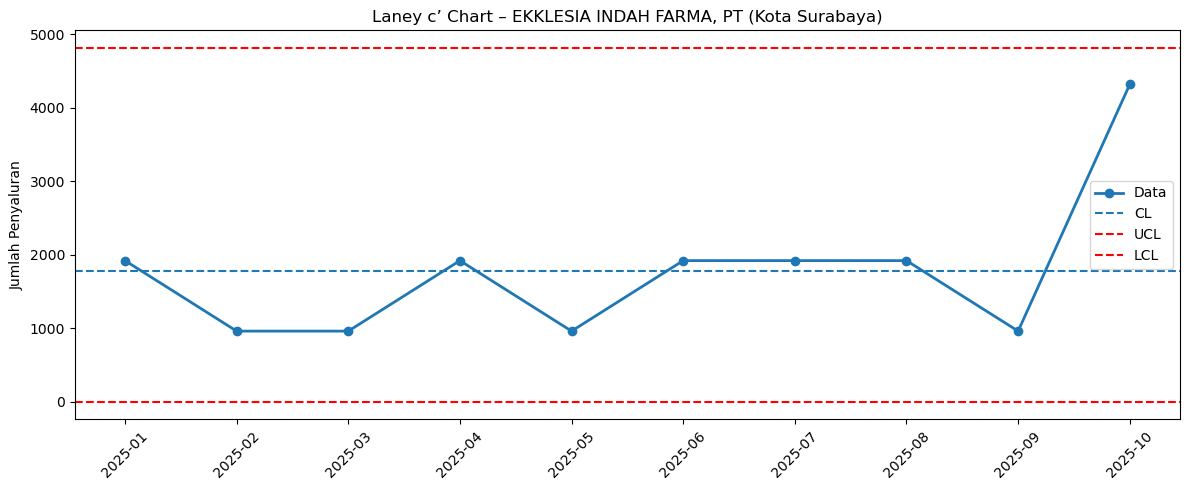


=== TITIK OUT-OF-CONTROL ===
Tidak ada titik keluar batas kendali.

ANALISIS SARANA: EDNU SURYA, PT

Penyaluran Bulanan:
2025-01       0
2025-02       0
2025-03       0
2025-04       0
2025-05    3840
2025-06    3840
2025-07    2880
2025-08    1920
2025-09       0
2025-10    2640
Name: Jumlah, dtype: int64

Runs Test
Z-Statistic: -1.0062
P-Value: 0.3143
Keputusan: Gagal tolak H0 → Data bersifat acak

UJI DISTRIBUSI POISSON
n: 10
Rata-rata (mu): 1512.0
P(x) minimum : 0.0
Alpha: 0.05
Keputusan: Tolak H0 → Data TIDAK mengikuti Poisson.

Laney c’ Chart
Z-Factor : 43.3565
CL : 1512.0
UCL: 6569.68
LCL: 0


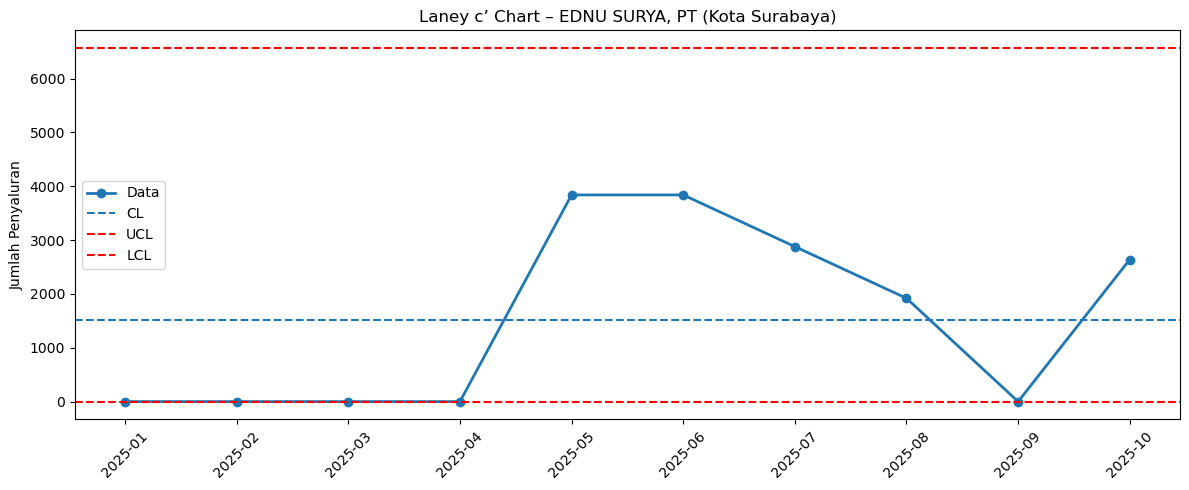


=== TITIK OUT-OF-CONTROL ===
Tidak ada titik keluar batas kendali.

ANALISIS SARANA: PIEROSCA TERANG SUKSES ABADI, PT

Penyaluran Bulanan:
2025-01    1200
2025-02     600
2025-03     600
2025-04    1200
2025-05    1200
2025-06    1200
2025-07     600
2025-08     600
2025-09     600
2025-10    2400
Name: Jumlah, dtype: int64

Runs Test
Z-Statistic: -0.3354
P-Value: 0.7373
Keputusan: Gagal tolak H0 → Data bersifat acak

UJI DISTRIBUSI POISSON
n: 10
Rata-rata (mu): 1020.0
P(x) minimum : 2.347504927452123e-295
Alpha: 0.05
Keputusan: Tolak H0 → Data TIDAK mengikuti Poisson.

Laney c’ Chart
Z-Factor : 17.8227
CL : 1020.0
UCL: 2727.63
LCL: 0


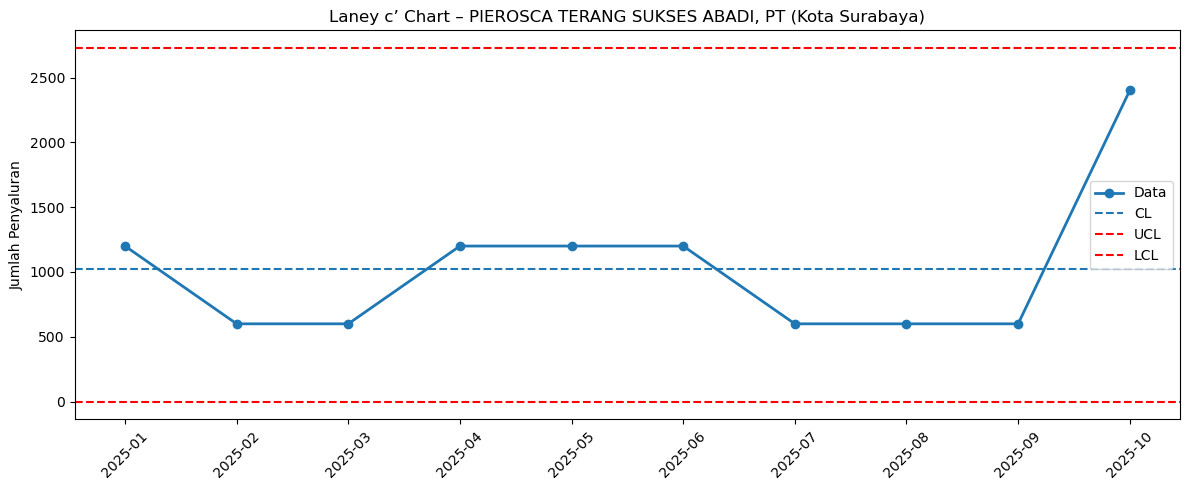


=== TITIK OUT-OF-CONTROL ===
Tidak ada titik keluar batas kendali.


In [17]:
# PILIH KOTA TERBANYAK UNTUK ANALISIS
kota_terbanyak = penyaluran_kota.iloc[0, 0]  
df_kota = df_jatim[df_jatim["Nama Kota/Kab Tujuan"] == kota_terbanyak]

penyaluran_apotek_kota = (
    df_kota.groupby("Tujuan Penyaluran")["Jumlah"]
           .sum()
           .reset_index()
           .sort_values(by="Jumlah", ascending=False)
           .head(5)
)
output_file = "Penyalurann Sarana Ifarsyl.xlsx"
penyaluran_apotek_kota.to_excel(output_file, index=False)

print(f"\n=== TOP 10 PENYALURAN OBAT IFARSYL PER SARANA DI {kota_terbanyak} ===")
print(penyaluran_apotek_kota)

# VISUALISASI TOP 5 SARANA
plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(penyaluran_apotek_kota)))

bars = plt.barh(
    penyaluran_apotek_kota["Tujuan Penyaluran"],
    penyaluran_apotek_kota["Jumlah"],
    color=colors
)

plt.xlabel("Total Jumlah Penyaluran")
plt.ylabel("Sarana")
plt.title(f"Top 5 Sarana Penyaluran Obat Ifarsyl di {kota_terbanyak}")

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f"{width:.0f}", va='center', ha='left', fontsize=8)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# PENYALURAN BULANAN – TOP 5 SARANA
df_kota_copy = df_kota.copy()
df_kota_copy["Tanggal Penyaluran"] = pd.to_datetime(df_kota_copy["Tanggal Penyaluran"], errors='coerce')
df_kota_copy["Bulan"] = df_kota_copy["Tanggal Penyaluran"].dt.to_period("M")
semua_bulan = pd.period_range(
    start=df_kota_copy["Bulan"].min(),
    end=df_kota_copy["Bulan"].max(),
    freq="M"
)

# STATISTIK DESKRIPTIF UNTUK PENYALURAN KOTA TERBANYAK
df_ifarsyl_surabaya = df_kota.copy()
df_ifarsyl_surabaya["Tanggal Penyaluran"] = pd.to_datetime(df_ifarsyl_surabaya["Tanggal Penyaluran"], errors='coerce')
df_ifarsyl_surabaya["Bulan"] = df_ifarsyl_surabaya["Tanggal Penyaluran"].dt.to_period("M")

penyaluran_bulanan_wilayah = (
    df_ifarsyl_surabaya.groupby("Bulan")["Jumlah"]
                 .sum()
                 .reindex(semua_bulan, fill_value=0)
)
penyaluran_bulanan_wilayah.index = penyaluran_bulanan_wilayah.index.astype(str)

print("\nSTATISTIKA DESKRIPTIF IFARSYL WILAYAH KOTA SURABAYA")
print(penyaluran_bulanan_wilayah.describe())

# Analisis per sarana: Runs Test, Poisson, Laney c’-chart
top3_sarana = penyaluran_apotek_kota["Tujuan Penyaluran"].head(3).tolist()
for sarana in top3_sarana:
    print(f"\nANALISIS SARANA: {sarana}")
    
    # Hitung penyaluran bulanan
    df_sarana = df_kota[df_kota["Tujuan Penyaluran"] == sarana].copy()
    df_sarana["Tanggal Penyaluran"] = pd.to_datetime(df_sarana["Tanggal Penyaluran"], errors='coerce')
    df_sarana["Bulan"] = df_sarana["Tanggal Penyaluran"].dt.to_period("M")
    
    penyaluran_bulanan = (
        df_sarana.groupby("Bulan")["Jumlah"]
                  .sum()
                  .reindex(semua_bulan, fill_value=0)
    )
    penyaluran_bulanan.index = penyaluran_bulanan.index.astype(str)
    
    print("\nPenyaluran Bulanan:")
    print(penyaluran_bulanan)
    
    # Uji Runs Test (Keacakan)
    from statsmodels.sandbox.stats.runs import runstest_1samp
    x = penyaluran_bulanan.values
    median_data = np.median(x)
    z_stat, p_value = runstest_1samp(x, cutoff=median_data)
    
    print("\nRuns Test")
    print("Z-Statistic:", round(z_stat,4))
    print("P-Value:", round(p_value,4))
    if p_value > 0.05:
        print("Keputusan: Gagal tolak H0 → Data bersifat acak")
    else:
        print("Keputusan: Tolak H0 → Data tidak acak")


    # Uji distribusi Poisson
    print("\nUJI DISTRIBUSI POISSON")
    
    from math import factorial, exp, log
    mu = penyaluran_bulanan.mean()
    alpha = 0.05

    p_val = []
    for xi in x:
        log_Px = xi * log(mu) - mu - log(factorial(xi))
        p_val.append(exp(log_Px))

    P_min = min(p_val)

    print("n:", len(x))
    print("Rata-rata (mu):", round(mu, 4))
    print("P(x) minimum :", P_min)
    print("Alpha:", alpha)

    if P_min <= alpha:
        print("Keputusan: Tolak H0 → Data TIDAK mengikuti Poisson.")
    else:
        print("Keputusan: Gagal tolak H0 → Data mengikuti Poisson.")

    # Laney c’-Chart
    print("\nLaney c’ Chart")
    CL = mu
    sigma_basic = np.sqrt(mu)
    observed_sigma = np.std(x, ddof=1)
    expected_sigma = sigma_basic

    Z = observed_sigma / expected_sigma
    sigma_laney = sigma_basic * Z

    UCL = CL + 3 * sigma_laney
    LCL = max(CL - 3 * sigma_laney, 0)

    print("Z-Factor :", round(Z, 4))
    print("CL :", round(CL, 2))
    print("UCL:", round(UCL, 2))
    print("LCL:", round(LCL, 2))

    # Plot Laney Chart
    plt.figure(figsize=(12, 5))
    plt.plot(penyaluran_bulanan.index, x, marker="o", linewidth=2, label="Data")
    plt.axhline(CL, linestyle="--", label="CL")
    plt.axhline(UCL, color="red", linestyle="--", label="UCL")
    plt.axhline(LCL, color="red", linestyle="--", label="LCL")
    
    for i, val in enumerate(x):
        if val > UCL or val < LCL:
            plt.plot(penyaluran_bulanan.index[i], val, 'ro', markersize=8)
    
    plt.title(f"Laney c’ Chart – {sarana} ({kota_terbanyak})")
    plt.xticks(rotation=45)
    plt.ylabel("Jumlah Penyaluran")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Titik out-of-control
    print("\n=== TITIK OUT-OF-CONTROL ===")
    out = []
    for i, val in enumerate(x):
        if val > UCL or val < LCL:
            out.append((penyaluran_bulanan.index[i], val))
    
    if len(out) == 0:
        print("Tidak ada titik keluar batas kendali.")
    else:
        for o in out:
            print(f"{o[0]} → {o[1]}")
